In [40]:
# import the required packages
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [41]:
# import the pacakges

import math
import scipy.stats as stats
from scipy.stats import percentileofscore

from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper
from feature_engine.transformation import BoxCoxTransformer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing import PolynomialFeatures

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# do pipelines, using sklearn method
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer,ArbitraryNumberImputer,RandomSampleImputer

from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler

from feature_engine.encoding import RareLabelEncoder
from sklearn.decomposition import PCA

## 1. HR Analytics

### 1.1 Load and Sample the data
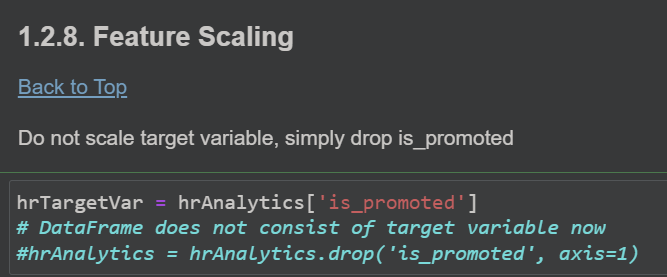

In [42]:
hrAnalytics = pd.read_csv("hr_analytics_final.csv", index_col=0)  # Sets the first column as the index

In [43]:
hrAnalytics

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,2,1.0,3.0,2.0,0,1,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,16.0,3.0,1.0,0,0,12.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,13.0,4.0,6.0,0,0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
3,1,1.0,4.0,0.0,1,0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,12.0,3.0,1.0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,1,8.0,3.0,1.0,1,0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
9332,1,15.0,5.0,5.0,1,0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
9333,2,2.0,4.0,1.0,1,0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9334,1,4.0,3.0,0.0,0,0,9.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [44]:
hrAnalytics.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,...,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,1.228578,7.634533,3.644494,3.441410,0.505677,0.066945,9.244002,0.047558,0.037168,0.016710,...,0.009319,0.092973,0.010818,0.003642,0.015531,0.291774,0.692695,0.026243,0.415917,0.500000
std,0.559690,5.102957,1.175499,2.926047,0.499995,0.249940,5.728589,0.212840,0.189183,0.128188,...,0.096088,0.290411,0.103453,0.060241,0.123660,0.454603,0.461402,0.159864,0.492906,0.500027
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,4.000000,3.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,1.000000,12.000000,5.000000,5.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,16.000000,5.000000,9.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
hrAnalytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9335
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               9336 non-null   int64  
 1   age                           9336 non-null   float64
 2   previous_year_rating          9336 non-null   float64
 3   length_of_service             9336 non-null   float64
 4   KPIs_met >80%                 9336 non-null   int64  
 5   awards_won?                   9336 non-null   int64  
 6   avg_training_score            9336 non-null   float64
 7   department_Finance            9336 non-null   float64
 8   department_HR                 9336 non-null   float64
 9   department_Legal              9336 non-null   float64
 10  department_Operations         9336 non-null   float64
 11  department_Procurement        9336 non-null   float64
 12  department_R&D                9336 non-null   float64
 13  dep

In [46]:
# Set the "Survived" as target/model output and the rest features as model inputs
y_data = hrAnalytics['is_promoted']
X_data = hrAnalytics.drop(['is_promoted'], axis=1)

In [47]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

### Understanding Information Gain (IG) of Feature and Target

Using Scikit learn's nutual information classifier module, `mutual_info_classif`, it calculates the mutual information between each feature, and the target variable. It measures the amount of information obtained about one random variable, thorugh observing another variable. Hence, in the context of feature selection, it can measure the dependence between feature and target.

This is especually useful for decision trees, since it uses things like information gain to determine splitting of features.

In [48]:
from sklearn.feature_selection import mutual_info_classif

X = hrAnalytics.drop('is_promoted', axis=1)
y = hrAnalytics['is_promoted']

mutual_info = mutual_info_classif(X, y)

To interpret the features, we see the scale of 0 to 1. 0 indicates no mutual information (irrelevant), and 1 indicates the perfect dependence. Hence, the closer to 1, the more relevance it holds between feature and target.

In [39]:
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Info_Score': mutual_info})

# # Print the feature importance DataFrame
# print(feature_importance_df)

# # Define thresholds for relevance
# highly_relevant_threshold = 0.05
# moderately_relevant_threshold = 0.02

# # Categorize features based on thresholds
# highly_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] >= highly_relevant_threshold]['Feature']
# moderately_relevant_features = feature_importance_df[(feature_importance_df['Mutual_Info_Score'] >= moderately_relevant_threshold) &
#                                                     (feature_importance_df['Mutual_Info_Score'] < highly_relevant_threshold)]['Feature']
# not_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] < moderately_relevant_threshold]['Feature']

# # Print the categorized features
# print("Highly Relevant Features:", highly_relevant_features.tolist())
# print("Moderately Relevant Features:", moderately_relevant_features.tolist())
# print("Not Relevant Features:", not_relevant_features.tolist())

We analyse that there is a threshold for the features to be relevant to the target variable. Features with relatively higher scores, which is more than 0.05, are:
- kpis met
- avg training score
- previous year rating (almost)
- awards won (almost)

Hence these are key factors that influence promotion

We can keep the more relevant ones (we now have only 4 columns)

In [12]:
# feature_columns = ['previous_year_rating', 
#                    'KPIs_met >80%', 
#                    'awards_won?', 
#                    'avg_training_score']

# # Filter the DataFrame to keep only the selected features
# X_train = X_train[feature_columns]
# X_test = X_test[feature_columns]

In [49]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
6274,1,6.0,4.0,0.0,0,0,16.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7665,1,6.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,1,10.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2776,1,9.0,3.0,0.0,1,0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7175,3,11.0,5.0,8.0,1,0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 1.2 Build the Model(s)

Types of models to be used:
- Logistic Regression
- Decision Tree Classifier
- Random Forest
- Artificial Neural Network (ANN)
- Support vector machines (SVM)

In [52]:
# Imports needed for this Practical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


Logistic Regression

In [63]:
# Logistic Regression - Create model "lg"
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Decision Tree

In [30]:

decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Random Forest

In [31]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

MLPClassifier()

### Support Vector Classifier

In [40]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

Evaluating Decision Tree

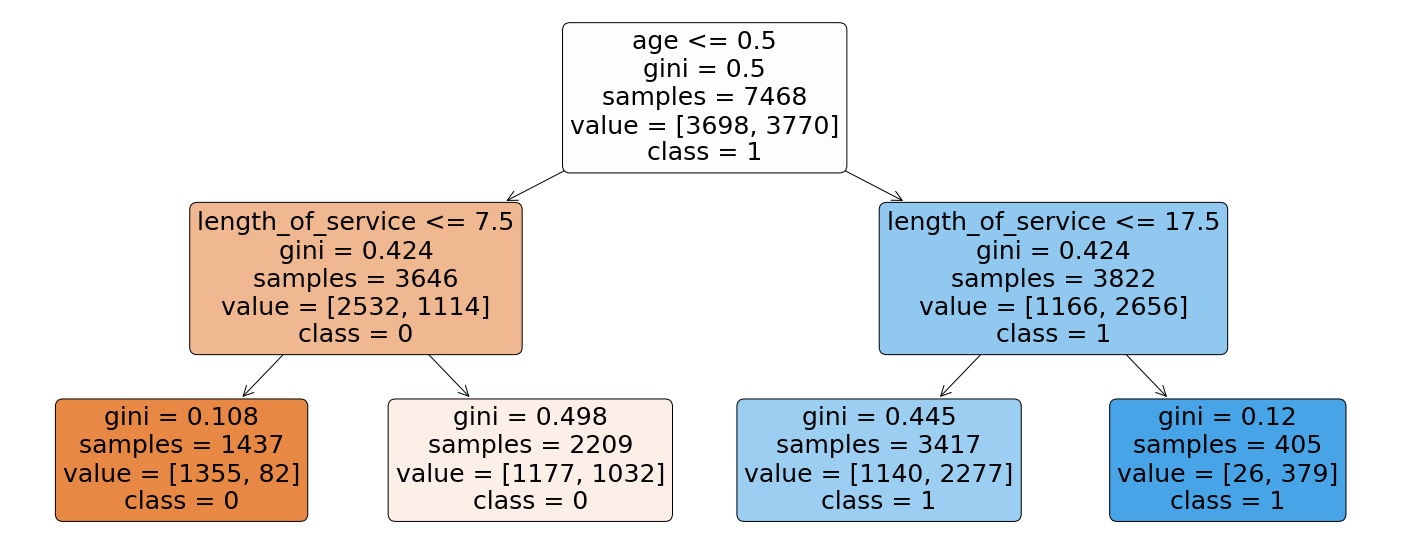

In [33]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0','1'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()              

In [34]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6946973754686663
the testing accuracy is:  0.686830835117773


In [35]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.69175147 0.69487214 0.69500602 0.6912572  0.69272995]
test_score:  [0.69860814 0.68612748 0.68559186 0.70058918 0.69469738]


### Evaluating Log Reg

In [65]:
#training acc
train_acc = lg.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = lg.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7904392072844135
the testing accuracy is:  0.7965738758029979


### Evalutuating Random Forest

In [38]:
#training acc
train_acc = rf.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = rf.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.776111408677022
the testing accuracy is:  0.7564239828693791


### Evaluating Neural Network

In [39]:
#training acc
train_acc = nn.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = nn.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7576325656132833
the testing accuracy is:  0.7462526766595289


### Evaluating Support Vector Classifier

In [41]:
#training acc
train_acc = svm.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = svm.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7194697375468666
the testing accuracy is:  0.7077087794432548


### 1.3 Evaluate and Improve the Model(s)

Improving the logistic regression model, using grid search. We grid search through multiple params in the 'solver' hyperparameter

In [66]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

grid = GridSearchCV(lg, param_grid, scoring='accuracy', cv= 10, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

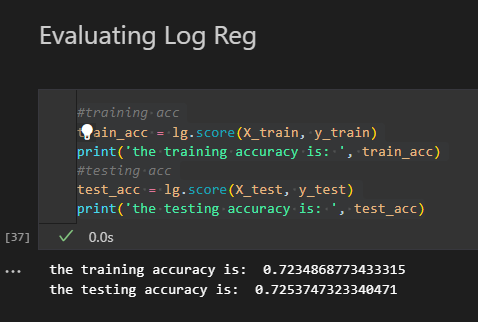

In [67]:
print('Best Estimator:', grid.best_estimator_)
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Estimator: LogisticRegression(solver='sag')
Best Score: 0.7862926235774196
Best Parameters: {'solver': 'sag'}


Since the newton cg is the best param, we go further to use this value obtained

In [68]:
lg = LogisticRegression(solver=grid.best_params_['solver'], max_iter=10000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [69]:
#training acc
train_acc = lg.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = lg.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7901713979646492
the testing accuracy is:  0.797644539614561


Lastly, we obtain the p values for the logistic regression model

In [70]:
lg2 = sm.Logit(y_train, X_train).fit()
print(lg2.summary())

         Current function value: 0.471346
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                 7468
Model:                          Logit   Df Residuals:                     7415
Method:                           MLE   Df Model:                           52
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.3199
Time:                        22:41:01   Log-Likelihood:                -3520.0
converged:                      False   LL-Null:                       -5176.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_trainings                 -0.2766      0.057     -4.860      0.000      -0.388      -0.165
age        

c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
# Get High P-Values (High confidence)
threshold = 0.05
cols = [i for i in lg2.pvalues.index if lg2.pvalues[i] <= threshold]
print(f"Features with P-Score <= {threshold}: {cols}")

# Redefine X and y
X2 = hrAnalytics[cols]
y2 = hrAnalytics["is_promoted"]

# Split Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, random_state=1)

Features with P-Score <= 0.05: ['no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department_Finance', 'department_HR', 'department_Legal', 'department_Operations', 'department_Procurement', 'department_R&D', 'department_Sales & Marketing', 'department_Technology', 'region_region_10', 'region_region_11', 'region_region_12', 'region_region_13', 'region_region_14', 'region_region_15', 'region_region_16', 'region_region_17', 'region_region_19', 'region_region_2', 'region_region_20', 'region_region_21', 'region_region_22', 'region_region_23', 'region_region_24', 'region_region_25', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_29', 'region_region_3', 'region_region_30', 'region_region_31', 'region_region_32', 'region_region_33', 'region_region_34', 'region_region_4', 'region_region_5', 'region_region_6', 'region_region_7', 'region_region_8', 'region_region_9', "education_Master's & above"]


Hence we accept the null hypothesis

In [72]:
xlabel = X_train_cols.columns[0]
ylabel = X_train_cols.columns[1]
xlabel

'awards_won?'

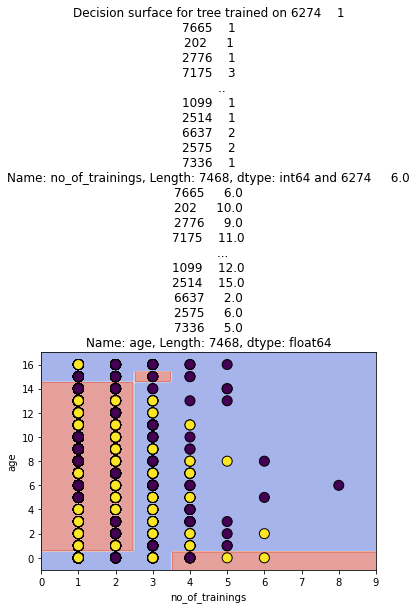

In [73]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 
# Choosing the first 2 columns for the plot
X_train_cols = X_train.iloc[:, :2]
xlabel = X_train_cols.columns[0]
ylabel = X_train_cols.columns[1]


SEED = 42
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=4, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', s=100, linewidth=1)


plt.title(f"Decision surface for tree trained on {X_train_cols.iloc[:, 0]} and {X_train_cols.iloc[:, 1]}")
plt.show()

Or, we can even use a custom function for this:

In [74]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, min(), xx1.max())
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='',
                    edgecolor = 'black',
                    alpha='o',
                    s = 100,
                    label = 'test set')

In [75]:
plot_decision_regions(X = X_train, y = y_train, classifier=lg)

InvalidIndexError: (slice(None, None, None), 0)

In [76]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
6274,1,6.0,4.0,0.0,0,0,16.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7665,1,6.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,1,10.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2776,1,9.0,3.0,0.0,1,0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7175,3,11.0,5.0,8.0,1,0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
X_train_cols = X_train.iloc[:, :2]
first_column = X_train_cols.iloc[:, 0]
first_column

6274    4.0
7665    5.0
202     5.0
2776    3.0
7175    5.0
       ... 
1099    3.0
2514    4.0
6637    1.0
2575    4.0
7336    4.0
Name: previous_year_rating, Length: 7468, dtype: float64

In [ ]:
# Setting some parameters that will be used in the plot
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red, same as the coolwarm palette
plot_step = 0.02

plt.figure(figsize=(25, 12))

for pair_idx, pair in enumerate(sorted(unique_combinations)):
    # Only two corresponding features are taken each time
    X_train_cols = X_train[:, pair]

    # Creating and fitting the classifier to train data
    classifier = DecisionTreeClassifier(max_depth=4, 
                                        random_state=SEED).fit(X_train_cols, y_train)

    # Defining a grid of 5 columns and 3 rows 
    ax = plt.subplot(3, 5, pair_idx + 1)
    # Plotting the pairs decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_train_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    # Plotting the training points according to y_train class colors
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0],
                    X_train_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.suptitle("Decision surface of decision trees trained on pairs of features", fontsize=14)
plt.legend(loc="lower right");

### Enhancing decision trees with deeper models

In [ ]:
SEED = 1
decision_tree = tree.DecisionTreeClassifier(max_depth = 6, random_state = SEED)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [ ]:
std_slc = StandardScaler()
std_slc

StandardScaler()

Here, we are using Decision Tree Classifier as a Machine Learning model to use GridSearchCV. So we have created an object dec_tree.

In [ ]:
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
dec_tree

DecisionTreeClassifier()

Pipeline will helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters. So we are making an object pipe to create a pipeline for all the three objects std_scl, pca and dec_tree.

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])

pipe

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA()),
                ('dec_tree', DecisionTreeClassifier())])

Now we have to define the parameters that we want to optimise for these three objects.
StandardScaler doesnot requires any parameters to be optimised by GridSearchCV.
Principal Component Analysis requires a parameter 'n_components' to be optimised. 'n_components' signifies the number of components to keep after reducing the dimension.

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
n_components

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV. So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

Now we are creating a dictionary to set all the parameters options for different objects.

In [ ]:
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2940 fits failed out of a total of 3180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\user\anaconda3\li

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 6
Best Number Of Components: 4

DecisionTreeClassifier(criterion='entropy', max_depth=6)


We can also make a separate pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

dt_model = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    DecisionTreeClassifier(criterion='entropy', max_depth=6)
)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_labeled_decision_regions(X, y, models):
    h = .02  # Step size in the mesh

    # Plot the decision boundary for each classifier
    for model in models:
        # Get the minimum and maximum values for the features
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

        # Create a meshgrid
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Flatten the meshgrid and make predictions
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape the predictions to match the meshgrid shape
        Z = Z.reshape(xx.shape)

        # Plot the decision regions
        plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot of the instances
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=70, linewidth=1)

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()


In [ ]:
d


### Logistic Regression Model

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Plot out the decision tree results, after grid search

In [ ]:
import os
print(os.getcwd())

c:\Users\user\Documents\Machine-Learning-with-HR-Analytics


In [ ]:
pts = np.loadtxt('c:/Users/user/Documents/Machine-Learning-with-HR-Analytics/linpts.txt')

FileNotFoundError: c:\Users\user\Documents\Machine-Learning-with-HR-Analytics\linpts.txt not found.

In [ ]:
plot_decision_boundary

### Decision Tree with only Relevant features

In [ ]:
# Create Decision Tree Model
decision_tree1_2 = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree1_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

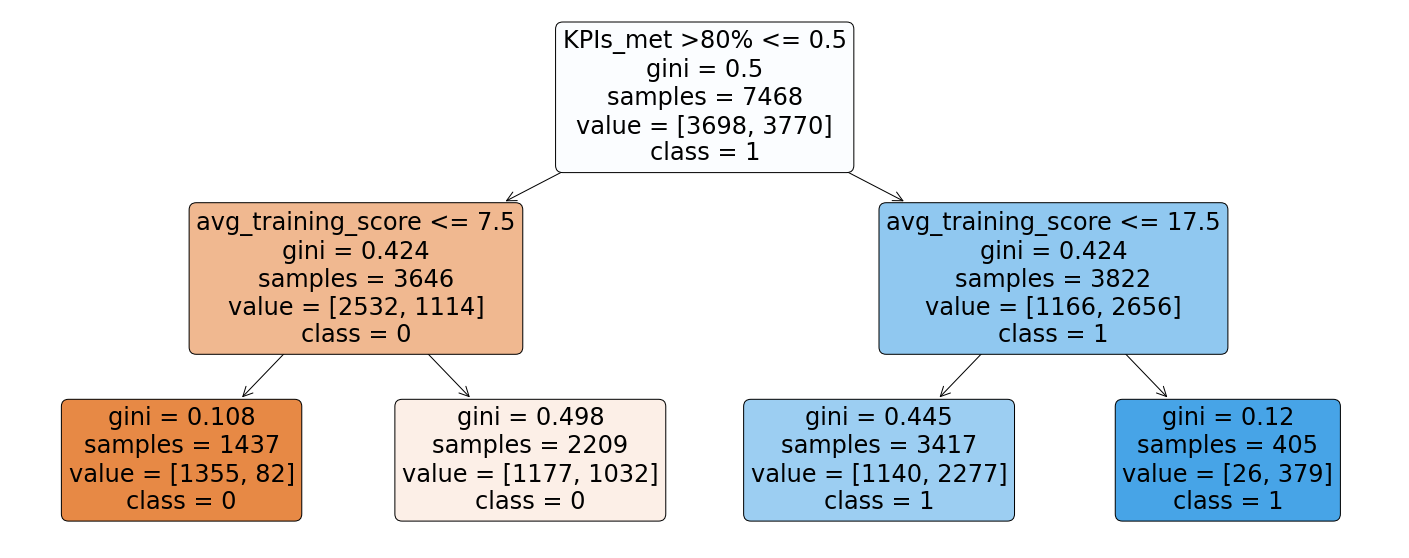

In [ ]:
plt.figure(figsize=(25, 10))
tree.plot_tree(decision_tree1_2,
               feature_names=feature_columns,
               class_names=['0', '1'],
               rounded=True,
               filled=True)
plt.savefig('tree1.png', format='png')
plt.show()


In [ ]:
#training acc
train_acc = decision_tree1_2.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6946973754686663
the testing accuracy is:  0.686830835117773


### 1.3 Evaluate and Improve the Model(s)

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7716939249401538
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 1, min_samples_split =2, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

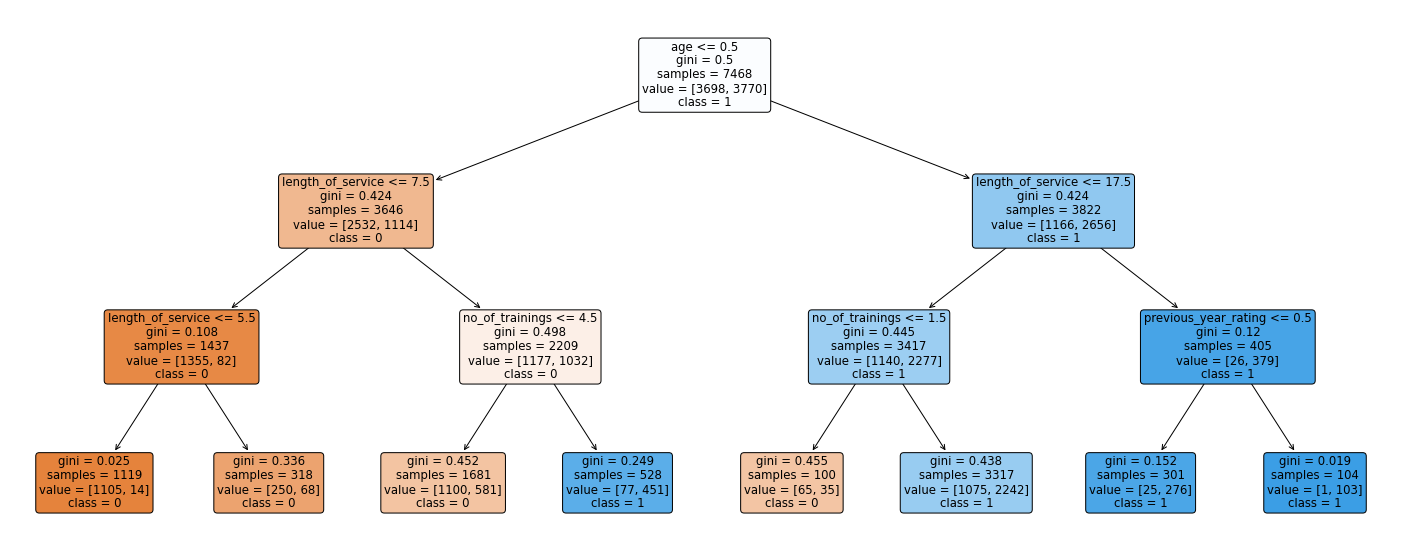

In [ ]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0', '1'],
                rounded = True,
                filled= True)
plt.savefig('tree2.png',format='png')
plt.show() 

In [ ]:
#Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.7487948580610605


In [ ]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.7408993576017131


### Using filtered data

### Using Support Vector Machine (SVM)

In [ ]:
def plot_classifier(X, y, classifier, lims=None, ax=None, plot_title=None):
    """
    Visualize the decision boundary of a classifier.

    Parameters:
    - X: Feature matrix (pandas DataFrame or numpy array)
    - y: Target vector (numpy array)
    - classifier: Classifier object with a 'predict' method
    - lims: Limits for the plot (optional, tuple)
    - ax: Matplotlib AxesSubplot object (optional)
    - plot_title: Title for the plot (optional, str)
    """
    if ax is None:
        _, ax = plt.subplots()

    # Convert pandas DataFrame to numpy array if necessary
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Plot the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k", marker="o")
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")

    # Add legend and labels
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if lims is not None:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[2], lims[3])

    if plot_title:
        ax.set_title(plot_title)

    return ax


In [ ]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [ ]:
import itertools

# Assuming X_train is your DataFrame and y_train is your target variable

# Selecting the features for visualization
selected_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
                      'KPIs_met >80%', 'awards_won?', 'avg_training_score',
                      'department_Finance', 'department_HR', 'department_Legal',
                      'department_Operations', 'department_Procurement', 'department_R&D',
                      'department_Sales & Marketing', 'department_Technology',
                      'region_region_10', 'region_region_11', 'region_region_12',
                      'region_region_13', 'region_region_14', 'region_region_15',
                      'region_region_16', 'region_region_17', 'region_region_18',
                      'region_region_19', 'region_region_2', 'region_region_20',
                      'region_region_21', 'region_region_22', 'region_region_23',
                      'region_region_24', 'region_region_25', 'region_region_26',
                      'region_region_27', 'region_region_28', 'region_region_29',
                      'region_region_3', 'region_region_30', 'region_region_31',
                      'region_region_32', 'region_region_33', 'region_region_34',
                      'region_region_4', 'region_region_5', 'region_region_6',
                      'region_region_7', 'region_region_8', 'region_region_9',
                      'education_Below Secondary', "education_Master's & above", 'gender_m',
                      'recruitment_channel_referred', 'recruitment_channel_sourcing']

# Get all possible combinations of two features
feature_combinations = list(itertools.combinations(selected_features, 2))

# Assuming svm is your SVM model
svm = SVC(kernel='linear')


In [ ]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_, :]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

Number of original examples 7468


AttributeError: 'SVC' object has no attribute 'support_'

### Support Vector Machine with onyl relevant columns to target var

In [ ]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [ ]:
feature_columns

['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [ ]:
import itertools

# Get all possible combinations of two features
feature_combinations = list(itertools.combinations(feature_columns, 2))

# Assuming svm is your SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm.decision_function(X_train)

array([-0.99960982,  1.00013941,  1.00013941, ..., -1.0003181 ,
        1.00016751, -0.99981531])

https://stackoverflow.com/questions/26261151/scikit-learn-linearsvc-how-to-get-support-vectors-from-the-trained-svm

In [ ]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
support_vectors = X_train.iloc[svm.support_, :]


Number of original examples 7468
Number of support vectors 4307


## 2. Airbnb

### 2.1 Load and Sample the data

In [ ]:
airbnb = pd.read_csv("airbnb_final.csv", index_col=0)  # Sets the first column as the index

In [ ]:
airbnb.head()

,neighbourhood,host_name,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,price
0,81.492537,76.000000,1,1,19.666667,-0.1,-1.038462,-0.152174,0.348837,-6.0,3.0,0.857143,83
1,153.969466,81.000000,1,4,9.666667,1.6,-0.519231,-0.173913,0.348837,-5.0,5.0,1.571429,81
2,81.492537,76.000000,1,1,0.333333,1.8,-0.673077,-0.152174,0.348837,-4.0,3.0,-2.000000,69
3,100.390625,170.222222,1,2,-0.222222,1.2,-0.769231,0.000000,0.308970,0.0,1.0,-0.571429,206
4,100.390625,170.222222,1,2,-0.222222,2.0,-0.634615,0.000000,0.315615,0.0,0.0,1.857143,94


In [ ]:
airbnb.describe()

,neighbourhood,host_name,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,price
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,169.332996,169.332996,1.472746,3.550778,1.612228,1.080739,0.618220,0.494284,-0.170344,-0.315290,-0.189579,0.075954,169.332996
std,141.296594,222.936148,0.590728,1.027596,4.677180,2.970775,2.046053,0.902166,0.485449,0.784444,2.028348,1.023875,340.187599
min,46.250000,14.000000,0.000000,0.000000,-0.222222,-0.200000,-1.038462,-0.173913,-0.863787,-6.000000,-6.000000,-2.000000,0.000000
25%,151.442553,83.000000,1.000000,4.000000,-0.222222,-0.200000,-0.423077,-0.152174,-0.684385,0.000000,0.000000,-0.428571,65.000000
50%,164.977901,138.225000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000
75%,177.441341,196.866667,2.000000,4.000000,0.777778,0.800000,0.576923,0.847826,0.315615,0.000000,1.000000,0.571429,199.000000
max,10000.000000,10000.000000,2.000000,4.000000,110.777778,32.100000,23.942308,2.347826,0.348837,0.000000,5.000000,2.285714,10000.000000


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   7907 non-null   float64
 1   host_name                       7907 non-null   float64
 2   room_type                       7907 non-null   int64  
 3   neighbourhood_group             7907 non-null   int64  
 4   minimum_nights                  7907 non-null   float64
 5   number_of_reviews               7907 non-null   float64
 6   reviews_per_month               7907 non-null   float64
 7   calculated_host_listings_count  7907 non-null   float64
 8   availability_365                7907 non-null   float64
 9   last_review_year                7907 non-null   float64
 10  last_review_month               7907 non-null   float64
 11  last_review_day                 7907 non-null   float64
 12  price                           79

In [ ]:
# Set the "Survived" as target/model output and the rest features as model inputs
y_data_airbnb = airbnb['price']
x_data_airbnb = airbnb.drop(['price'], axis=1)

In [ ]:
# Split the data into training and testing data
X_train_airbnb, X_test_airbnb, y_train_airbnb, y_test_airbnb = train_test_split(x_data_airbnb, y_data_airbnb, test_size=0.2, random_state=2)

In [ ]:
X_train_airbnb.shape

(6325, 12)

In [ ]:
y_train_airbnb.shape

(6325,)

In [ ]:
y_train_airbnb.ravel()

array([450, 131,  44, ..., 119,  49, 669], dtype=int64)

### 2.2 Build the Model(s)

### Random Forest Regressor

In [ ]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=20)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(X_train_airbnb, y_train_airbnb.ravel()) 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=1)

In [ ]:
train_score = rf_reg.score(X_train_airbnb, y_train_airbnb)
train_mse = mean_squared_error(y_train_airbnb, rf_reg.predict(X_train_airbnb))
print("Training R^2:", train_score)
print("Training MSE:", train_mse)


Training R^2: 0.48785294774524246
Training MSE: 48913.880501978514


In [ ]:
predictions = rf_reg.predict(X_test_airbnb)

# 5. Interpret feature importances
feature_importances = rf_reg.feature_importances_
print("Feature importances:", feature_importances)

Feature importances: [0.11648581 0.68629095 0.         0.0169887  0.         0.01651808
 0.00816495 0.         0.0800767  0.         0.02935981 0.04611501]


In [ ]:
test_score = rf_reg.score(X_test_airbnb, y_test_airbnb)
test_mse = mean_squared_error(y_test_airbnb, rf_reg.predict(X_test_airbnb))
print("Training R^2:", test_score)
print("Training MSE:", test_mse)


Training R^2: 0.23666848356372983
Training MSE: 149930.32431974506


In [ ]:
# Task 3: Evaluate the Model using K-folds Cross validation
results = cross_validate(svmModel, X_train_airbnb, y_train_airbnb.ravel(), scoring=['neg_mean_squared_error', 'r2'], cv=5, return_train_score=True)

print('cross val training MSE:', -results['train_neg_mean_squared_error'].mean())
print('cross val testing MSE:', -results['test_neg_mean_squared_error'].mean())

print('cross val training R-squared:', results['train_r2'].mean())
print('cross val testing R-squared:', results['test_r2'].mean())


cross val training MSE: 53333.51308416899
cross val testing MSE: 54233.96370018229
cross val training R-squared: 0.4399832135875311
cross val testing R-squared: 0.4034443379368885


### Grid Search CV for Random Forest Regressor

https://stackoverflow.com/questions/43590489/gridsearchcv-random-forest-regressor-tuning-best-params


In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [ ]:
for i in range(5):
    print("Loop: " , i)
    print("--------------")
    X_train_airbnb, X_test_airbnb, y_train_airbnb, y_test_airbnb = splitter_v2(tabla,1)
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)  
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print "Best Score:" ,best_score
    print "Best params:",best_params

In [ ]:
# Task 2: Build Model and Evaluate both training and testing MSE
from sklearn import svm
from sklearn.metrics import mean_squared_error

svmModel = svm.SVR(kernel='linear',gamma=0.001,C=0.1)
svmModel.fit(X_train_airbnb,y_train_airbnb.ravel())

print('training mean squared error: ', mean_squared_error(svmModel.predict(X_train_airbnb), y_train_airbnb))
print('testing mean squared error: ', mean_squared_error(svmModel.predict(X_test_airbnb), y_test_airbnb))

training mean squared error:  53424.097733943716
testing mean squared error:  113291.19049823751


In [ ]:
def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print("R2 score:", r2(y_test,y_predict))
    return y_test,y_predict

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Add polynomial features
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), SVR(kernel='poly', C=1, gamma='auto'))

# Fit the model
polyreg.fit(X_train_airbnb, y_train_airbnb.ravel())


ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to be preprocessed.

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(polyreg.predict(X_train), Y_train)
mse_test = mean_squared_error(polyreg.predict(X_test), Y_test)

print('Training MSE:', mse_train)
print('Testing MSE:', mse_test)

### 2.3 Evaluate and Improve the Model(s)

### Sources:
DataCamp on Linear Classifiers in Python
https://campus.datacamp.com/courses/linear-classifiers-in-python/support-vector-machines?ex=3